In [ ]:
import os
import tensorflow as tf
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/dataset/archive.zip' -d '/content/sample_data/dataset'

Streaming output truncated to the last 5000 lines.
  inflating: /content/sample_data/dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.09 PM.png  
  inflating: /content/sample_data/dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.18 PM.png  
  inflating: /content/sample_data/dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.24 PM.png  
  inflating: /content/sample_data/dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.37 PM.png  
  inflating: /content/sample_data/dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.02.51 PM.png  
  inflating: /content/sample_data/dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.02 PM.png  
  inflating: /content/sample_data/dataset/dataset/train/rottenapples/rotated_by_60_Screen Shot 2018-06-07 at 3.03.12 PM.png  
  inflating: /content/sample_data/dataset/dataset/train/rottenapple

In [ ]:
mainPath = '/content/sample_data/dataset/dataset'

In [ ]:
trainPath = os.path.join(mainPath,'train')

In [ ]:
for i in os.listdir(trainPath):
  print(i)

freshoranges
rottenbanana
rottenapples
rottenoranges
freshbanana
freshapples


freshoranges : 1466, resolusi : (344, 434, 3)
rottenbanana : 2224, resolusi : (338, 582, 3)
rottenapples : 2342, resolusi : (262, 292, 3)
rottenoranges : 1595, resolusi : (404, 522, 3)
freshbanana : 1581, resolusi : (332, 518, 3)
freshapples : 1693, resolusi : (350, 366, 3)


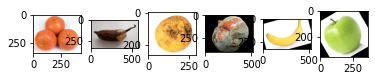

In [ ]:
for index,nameFolder in enumerate(os.listdir(trainPath)):
  lenFile = len(os.listdir(os.path.join(trainPath,nameFolder)))
  foto = cv2.cvtColor(cv2.imread(os.path.join(os.path.join(trainPath,nameFolder),os.listdir(os.path.join(trainPath,nameFolder))[0])),cv2.COLOR_BGR2RGB)
  print(f"{nameFolder} : {lenFile}, resolusi : {foto.shape}")
  plt.subplot(1,6,index+1)
  plt.imshow(foto)

In [ ]:
os.path.join(os.path.join(trainPath,nameFolder),os.listdir(os.path.join(trainPath,nameFolder))[0])

'/content/sample_data/dataset/dataset/train/freshapples/rotated_by_30_Screen Shot 2018-06-08 at 5.03.10 PM.png'

In [ ]:
os.path.join(os.path.join(trainPath,nameFolder),os.listdir(os.path.join(trainPath,nameFolder))[0])

'/content/sample_data/dataset/dataset/train/freshapples/rotated_by_30_Screen Shot 2018-06-08 at 5.03.10 PM.png'

In [ ]:
imageDataGen = ImageDataGenerator(rescale=1./255,validation_split=0.05) # no augmentation , the data has already had the rotate one

In [ ]:
trainData = imageDataGen.flow_from_directory(trainPath,target_size=(200,200),subset='training')

Found 10358 images belonging to 6 classes.


In [ ]:
testData = imageDataGen.flow_from_directory(trainPath,target_size=(200,200),subset='validation')

Found 543 images belonging to 6 classes.


In [ ]:
trainData.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [ ]:
model = tf.keras.Sequential([
    Conv2D(64,[3,3],activation='relu',input_shape=(200,200,3)),
    MaxPooling2D(),
    Conv2D(64,[3,3],activation='relu'),
    MaxPooling2D(),
    Conv2D(64,[3,3],activation='relu'),
    MaxPooling2D(),
    tf.keras.layers.GlobalAveragePooling2D(),
    Dense(25,activation='relu'),
    Dropout(0.4),
    Dense(6,activation='softmax')
])
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.85 and logs.get('accuracy')>0.9):
      print("val_accuracy has been 85%")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(trainData,epochs=100,verbose=1,callbacks=[callbacks],validation_data=testData)

Epoch 1/100
324/324 [==============================] - 70s 194ms/step - loss: 1.6736 - accuracy: 0.2977 - val_loss: 1.5545 - val_accuracy: 0.3444
Epoch 2/100
324/324 [==============================] - 62s 192ms/step - loss: 1.4965 - accuracy: 0.3663 - val_loss: 1.4597 - val_accuracy: 0.3499
Epoch 3/100
324/324 [==============================] - 61s 187ms/step - loss: 1.3317 - accuracy: 0.4595 - val_loss: 1.1669 - val_accuracy: 0.5709
Epoch 4/100
324/324 [==============================] - 60s 186ms/step - loss: 1.2103 - accuracy: 0.5126 - val_loss: 1.0264 - val_accuracy: 0.5672
Epoch 5/100
324/324 [==============================] - 60s 184ms/step - loss: 1.0583 - accuracy: 0.5733 - val_loss: 0.9281 - val_accuracy: 0.6354
Epoch 6/100
324/324 [==============================] - 60s 183ms/step - loss: 1.0140 - accuracy: 0.5924 - val_loss: 0.9517 - val_accuracy: 0.6004
Epoch 7/100
324/324 [==============================] - 60s 184ms/step - loss: 0.9598 - accuracy: 0.6223 - val_loss: 0.9443 -

KeyboardInterrupt: ignored

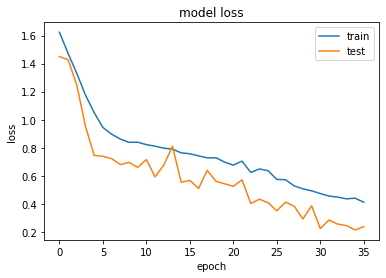

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'])

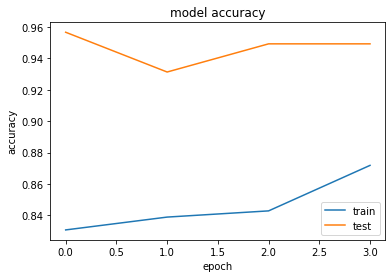

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

In [ ]:
savedModelPath = '/content/sample_data/saveModels'
tf.saved_model.save(model, savedModelPath)

INFO:tensorflow:Assets written to: /content/sample_data/saveModels/assets


In [ ]:
model.save('/content/sample_data/models.h5')

In [ ]:
!pip install tensorflowjs


In [ ]:
!tensorflowjs_converter --input_format=keras /content/sample_data/models.h5 /content/sample_data/modelas1

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(savedModelPath)
tflite_model = converter.convert()

NameError: ignored

In [ ]:
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)